<a href="https://colab.research.google.com/github/davensethi/davensethi.github.io/blob/master/davensethi.github.io/_posts/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()

Saving NBA Win Loss Record.xlsx to NBA Win Loss Record.xlsx


In [4]:
df = pd.read_excel ('NBA Win Loss Record.xlsx')

In [5]:
print(df.head())
df.tail()

    Season   Lg  ATL  BOS  BRK  CHI  CHO  ...  PHO  POR  SAC  SAS  TOR  UTA  WAS
0  2019-20  NBA   20   48   35   22   23  ...   34   35   31   32   53   44   25
1  2018-19  NBA   29   49   42   22   39  ...   19   53   39   48   58   50   32
2  2017-18  NBA   24   55   28   27   36  ...   21   49   27   47   59   48   43
3  2016-17  NBA   43   53   20   41   36  ...   24   41   32   61   51   51   49
4  2015-16  NBA   48   48   21   42   48  ...   23   44   33   67   56   40   41

[5 rows x 32 columns]


,Season,Lg,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
15,2004-05,NBA,13,45,42,47,18,42,58,49,54,34,51,44,37,34,45,59,30,44,18.0,33,52,36,43,62,27,50,59,33,26,45
16,2003-04,NBA,28,36,47,23,41,35,52,43,54,37,45,61,28,56,50,42,41,58,41.0,39,37,21,33,29,41,55,57,33,42,25
17,2002-03,NBA,35,44,49,30,27,17,60,17,50,38,43,48,27,50,28,25,42,51,47.0,37,40,42,48,44,50,59,60,24,47,37
18,2001-02,NBA,33,49,52,21,44,29,57,27,50,21,28,42,39,58,23,36,41,50,NaN,30,45,44,43,36,49,61,58,42,44,37
19,2000-01,NBA,25,36,26,36,46,30,53,40,32,17,45,41,31,56,22,50,52,47,NaN,48,44,43,56,51,50,55,44,47,53,19


In [6]:
df.isnull().any().value_counts()

False    31
True      1
dtype: int64

In [7]:
df1 =df.reset_index()

In [8]:
df1= df.drop(df.index[18])
df1= df1.drop(df1.index[18])
df1 =df1.drop(['Season','Lg'], axis=1)
#df1.tail()

In [9]:
df1 =df1.append(df1.mean().rename('Average_Wins')).assign(mean_basket=lambda df1: df1.mean(1))

In [10]:
df2 =df1.T
df2 =df2.reset_index()
df2 = df2.rename(columns = {"index":"Name"}) 
df2.tail(5)
df2= df2.drop(df2.index[30])

In [11]:
df3=df2['Name'],df2['Average_Wins']
df3=pd.DataFrame(df3)
df3 =df3.T
df3.sort_values(by=['Average_Wins'], inplace=True, ascending=True)
df3.head(5)

,Name,Average_Wins
19,NYK,31.3889
17,MIN,31.7222
4,CHO,32
25,SAC,34.1111
29,WAS,35


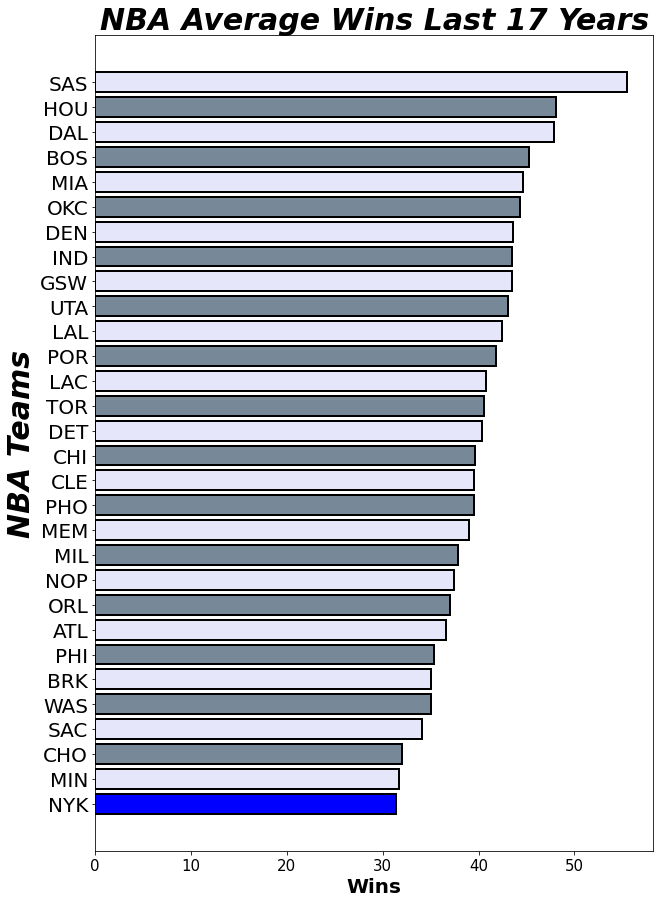

In [12]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 15
fig, ax = plt.subplots()

plt.barh(df3['Name'], df3["Average_Wins"], edgecolor='black', linewidth=2, color= ['blue', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender',
                                                   'lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender',
                                                   'lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender','lightslategrey', 'lavender'])
plt.xlabel("Wins",fontsize=20,fontweight='bold')
plt.ylabel("NBA Teams",fontsize=30,fontweight='bold',style='italic',)
plt.title("NBA Average Wins Last 17 Years",fontsize=30,style='italic',fontweight='bold')
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 20) 





plt.show()

In [13]:
df_last10= df.drop(df.index[10:20])
df_last10= df_last10.drop(['Season','Lg'], axis=1)
df_last10 =df_last10.append(df_last10.mean().rename('Average_Wins')).assign(mean_basket=lambda df1: df_last10.mean(1))
df_last10= df_last10.drop(['mean_basket'], axis=1)
df_last10

,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,20.0,48.0,35.0,22.0,23.0,19.0,43.0,46.0,20.0,15.0,44.0,45.0,49.0,52.0,34.0,44.0,56.0,19.0,30.0,21.0,44.0,33.0,43.0,34.0,35.0,31.0,32.0,53.0,44.0,25.0
1,29.0,49.0,42.0,22.0,39.0,19.0,33.0,54.0,41.0,57.0,53.0,48.0,48.0,37.0,33.0,39.0,60.0,36.0,33.0,17.0,49.0,42.0,51.0,19.0,53.0,39.0,48.0,58.0,50.0,32.0
2,24.0,55.0,28.0,27.0,36.0,50.0,24.0,46.0,39.0,58.0,65.0,48.0,42.0,35.0,22.0,44.0,44.0,47.0,48.0,29.0,48.0,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0
3,43.0,53.0,20.0,41.0,36.0,51.0,33.0,40.0,37.0,67.0,55.0,42.0,51.0,26.0,43.0,41.0,42.0,31.0,34.0,31.0,47.0,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0
4,48.0,48.0,21.0,42.0,48.0,57.0,42.0,33.0,44.0,73.0,41.0,45.0,53.0,17.0,42.0,48.0,33.0,29.0,30.0,32.0,55.0,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0
5,60.0,40.0,38.0,50.0,33.0,53.0,50.0,30.0,32.0,67.0,56.0,38.0,56.0,21.0,55.0,37.0,41.0,16.0,45.0,17.0,45.0,25.0,18.0,39.0,51.0,29.0,55.0,49.0,38.0,46.0
6,38.0,25.0,44.0,48.0,43.0,33.0,49.0,36.0,29.0,51.0,54.0,56.0,57.0,27.0,50.0,54.0,15.0,40.0,34.0,37.0,59.0,23.0,19.0,48.0,54.0,28.0,62.0,48.0,25.0,44.0
7,44.0,41.0,49.0,45.0,21.0,24.0,41.0,57.0,29.0,47.0,45.0,49.0,56.0,45.0,56.0,66.0,38.0,31.0,27.0,54.0,60.0,20.0,34.0,25.0,33.0,28.0,58.0,34.0,43.0,29.0
8,40.0,39.0,22.0,50.0,7.0,21.0,36.0,38.0,25.0,23.0,34.0,42.0,40.0,41.0,41.0,46.0,31.0,26.0,21.0,36.0,47.0,37.0,35.0,33.0,28.0,22.0,50.0,23.0,36.0,20.0
9,44.0,56.0,24.0,62.0,34.0,19.0,57.0,50.0,30.0,36.0,43.0,37.0,32.0,57.0,46.0,58.0,35.0,17.0,46.0,42.0,55.0,52.0,41.0,40.0,48.0,24.0,61.0,22.0,39.0,23.0


In [14]:
df_last10=df_last10.T
df_last10 =df_last10.reset_index()
df_last10 = df_last10.rename(columns = {"index":"Name"})



In [15]:
df_last10b =df_last10['Name'],df_last10['Average_Wins']
df_last10b=pd.DataFrame(df_last10b)
df_last10b
df_last10b =df_last10b.T
df_last10b.sort_values(by=['Average_Wins'], inplace=True, ascending=True)


In [16]:

df_last10b.shape


(30, 2)

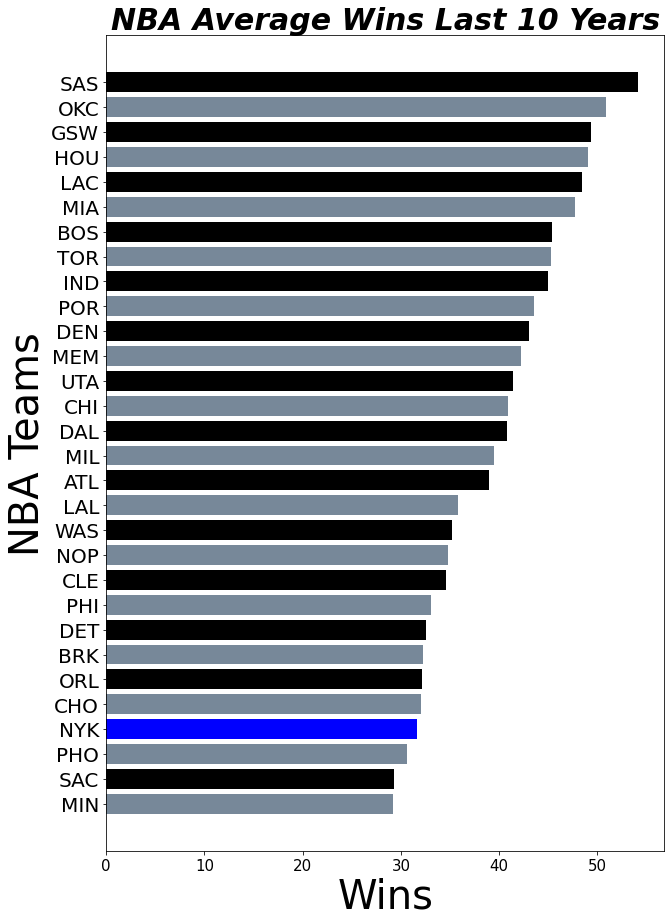

In [17]:
rcParams['figure.figsize'] = 10, 15

plt.barh(df_last10b['Name'], df_last10b["Average_Wins"], color=['lightslategrey', 'black','lightslategrey', 'blue','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black',
                                                   'lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black',
                                                   'lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black'])
plt.ylabel("NBA Teams",fontsize=40)
plt.xlabel("Wins",fontsize=40)
plt.title("NBA Average Wins Last 10 Years",fontsize=30,style='italic',fontweight='bold')
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 20) 

plt.show()

In [18]:
Last_five= df.drop(df.index[5:20])
Last_five= Last_five.drop(['Season','Lg'], axis=1)
Last_five =Last_five.append(Last_five.mean().rename('Average_Wins'))

Last_five

,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,20.0,48.0,35.0,22.0,23.0,19.0,43.0,46.0,20.0,15.0,44.0,45.0,49.0,52.0,34.0,44.0,56.0,19.0,30.0,21.0,44.0,33.0,43.0,34.0,35.0,31.0,32.0,53.0,44.0,25.0
1,29.0,49.0,42.0,22.0,39.0,19.0,33.0,54.0,41.0,57.0,53.0,48.0,48.0,37.0,33.0,39.0,60.0,36.0,33.0,17.0,49.0,42.0,51.0,19.0,53.0,39.0,48.0,58.0,50.0,32.0
2,24.0,55.0,28.0,27.0,36.0,50.0,24.0,46.0,39.0,58.0,65.0,48.0,42.0,35.0,22.0,44.0,44.0,47.0,48.0,29.0,48.0,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0
3,43.0,53.0,20.0,41.0,36.0,51.0,33.0,40.0,37.0,67.0,55.0,42.0,51.0,26.0,43.0,41.0,42.0,31.0,34.0,31.0,47.0,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0
4,48.0,48.0,21.0,42.0,48.0,57.0,42.0,33.0,44.0,73.0,41.0,45.0,53.0,17.0,42.0,48.0,33.0,29.0,30.0,32.0,55.0,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0
Average_Wins,32.8,50.6,29.2,30.8,36.4,39.2,35.0,43.8,36.2,54.0,51.6,45.6,48.6,33.4,34.8,43.2,47.0,32.4,35.0,26.0,48.6,32.8,36.8,24.2,44.4,32.4,51.0,55.4,46.6,38.0


In [19]:
Last_five=Last_five.T
Last_five =Last_five.reset_index()
Last_five = Last_five.rename(columns = {"index":"Name"})
Last_five.head(4)

,Name,0,1,2,3,4,Average_Wins
0,ATL,20.0,29.0,24.0,43.0,48.0,32.8
1,BOS,48.0,49.0,55.0,53.0,48.0,50.6
2,BRK,35.0,42.0,28.0,20.0,21.0,29.2
3,CHI,22.0,22.0,27.0,41.0,42.0,30.8


In [20]:
Last_fiveb =Last_five['Name'],Last_five['Average_Wins']
Last_fiveb=pd.DataFrame(Last_fiveb)
Last_fiveb = Last_fiveb.T
Last_fiveb.sort_values(by=['Average_Wins'], inplace=True, ascending=True)
Last_fiveb.head()

,Name,Average_Wins
23,PHO,24.2
19,NYK,26
2,BRK,29.2
3,CHI,30.8
25,SAC,32.4


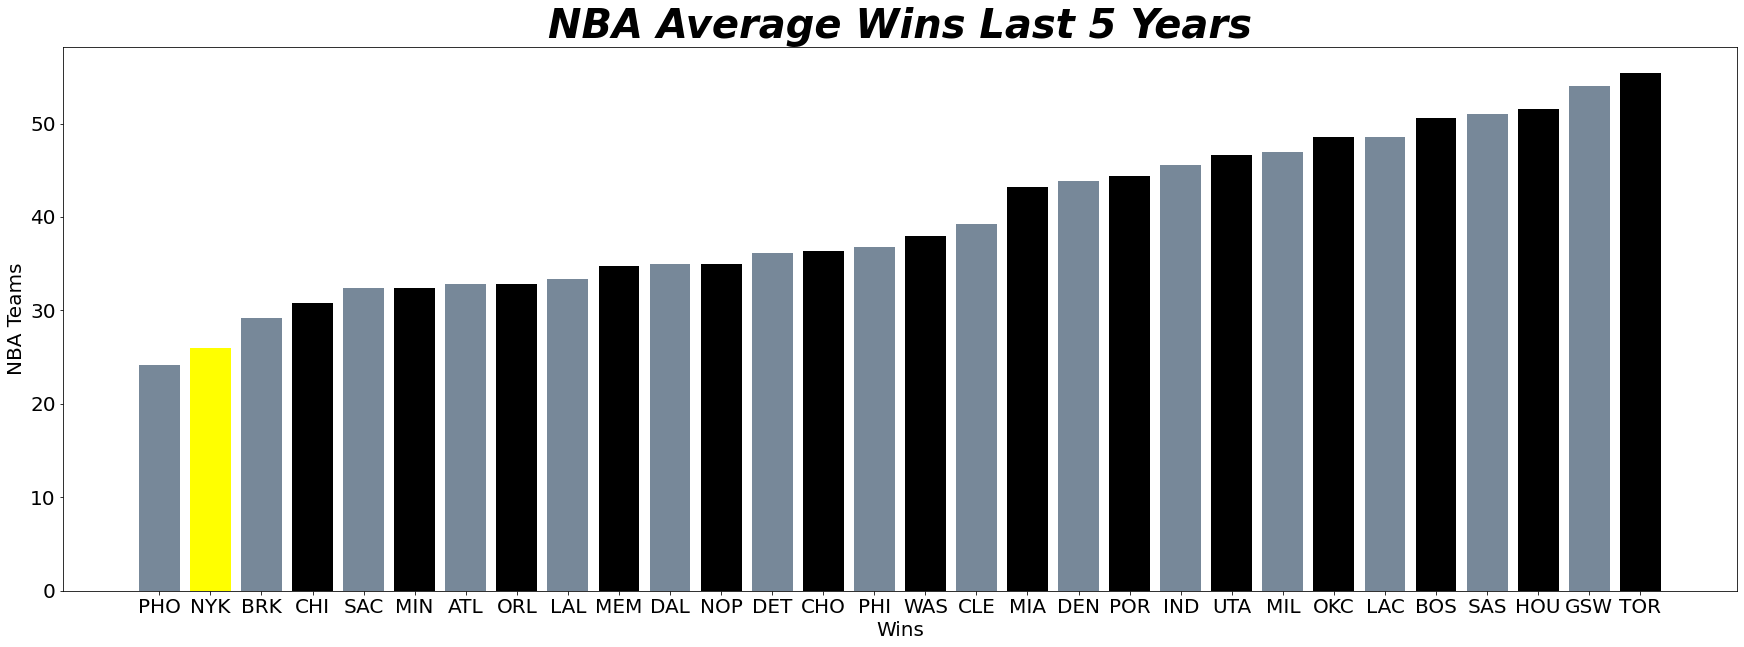

In [26]:
rcParams['figure.figsize'] = 30, 10

plt.bar(Last_fiveb['Name'], Last_fiveb["Average_Wins"], color=['lightslategrey', 'yellow','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black',
                                                   'lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black',
                                                   'lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black','lightslategrey', 'black'])
plt.xlabel("Wins",fontsize=20)
plt.ylabel("NBA Teams",fontsize=20)
plt.title("NBA Average Wins Last 5 Years",fontsize=40,style='italic',fontweight='bold')
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 


plt.show()

In [27]:
df3.head(5)

,Name,Average_Wins
19,NYK,31.3889
17,MIN,31.7222
4,CHO,32
25,SAC,34.1111
29,WAS,35


In [28]:
df_last10b.head(5)

,Name,Average_Wins
17,MIN,29.2
25,SAC,29.3
23,PHO,30.6
19,NYK,31.6
4,CHO,32


In [29]:
Last_fiveb.head(5)

,Name,Average_Wins
23,PHO,24.2
19,NYK,26
2,BRK,29.2
3,CHI,30.8
25,SAC,32.4


In [54]:
from google.colab import files
uploaded = files.upload()

Saving NY Knick Coaches.xlsx to NY Knick Coaches (1).xlsx


In [55]:
coaches = pd.read_excel ('NY Knick Coaches.xlsx',skiprows=1)

In [56]:
coaches.tail(10)

,Unnamed: 0,Name,Term,Games Coached,Win,Loss,Win%,P_coach,win,Losses,Win %,Unnamed: 11,Unnamed: 12
26,22,Larry Brown,2005–2006,82.0,23.0,59.0,0.28,—,—,—,—,NaN,[31]
27,23,Isiah Thomas,2006–2008,164.0,56.0,108.0,0.341,—,—,—,—,NaN,[32]
28,24,Mike D'Antoni,2008–2012,288.0,121.0,167.0,0.42,4,0,4,0,NaN,[33]
29,25,Mike Woodson,2012–2014,188.0,109.0,79.0,0.58,17,7,10,0.412,NaN,[34]
30,26,Derek Fisher*,2014–2016,136.0,40.0,96.0,0.294,—,—,—,—,NaN,[35]
31,27,Kurt Rambis,2016,28.0,9.0,19.0,0.321,—,—,—,—,—,[36]
32,28,Jeff Hornacek,2016–2018,164.0,60.0,104.0,0.366,—,—,—,—,—,[37]
33,29,David Fizdale,2018–2019,104.0,21.0,83.0,0.202,—,—,—,—,—,[38]
34,30,Mike Miller,2019–2020,44.0,17.0,27.0,0.386,—,—,—,—,—,[39]
35,31,Tom Thibodeau,2020–future,0.0,0.0,0.0,–,—,—,—,—,—,NaN


In [57]:
##df_last10= df.drop(df.index[10:20])
coaches = coaches.reset_index()

In [58]:
coaches.tail(5)
coaches=coaches.drop(columns=['Games Coached','P_coach','Unnamed: 0','Loss ','Win ','Unnamed: 11',
                      'Unnamed: 12','win ', 'Losses' ,	'Win %'])

coaches = coaches.drop(coaches.index[0:22])


In [59]:

smaller_coaches=coaches.drop(coaches.index[1])
smaller_coaches.reset_index()
smaller_coaches = smaller_coaches.drop(smaller_coaches.index[12])



In [60]:
smaller_coaches

,index,Name,Term,Win%
22,22,Don Chaney,2001–2004,0.391
24,24,Lenny Wilkens,2004–2005,0.494
25,25,Herb Williams*,2005,0.372
26,26,Larry Brown,2005–2006,0.28
27,27,Isiah Thomas,2006–2008,0.341
28,28,Mike D'Antoni,2008–2012,0.42
29,29,Mike Woodson,2012–2014,0.58
30,30,Derek Fisher*,2014–2016,0.294
31,31,Kurt Rambis,2016,0.321
32,32,Jeff Hornacek,2016–2018,0.366


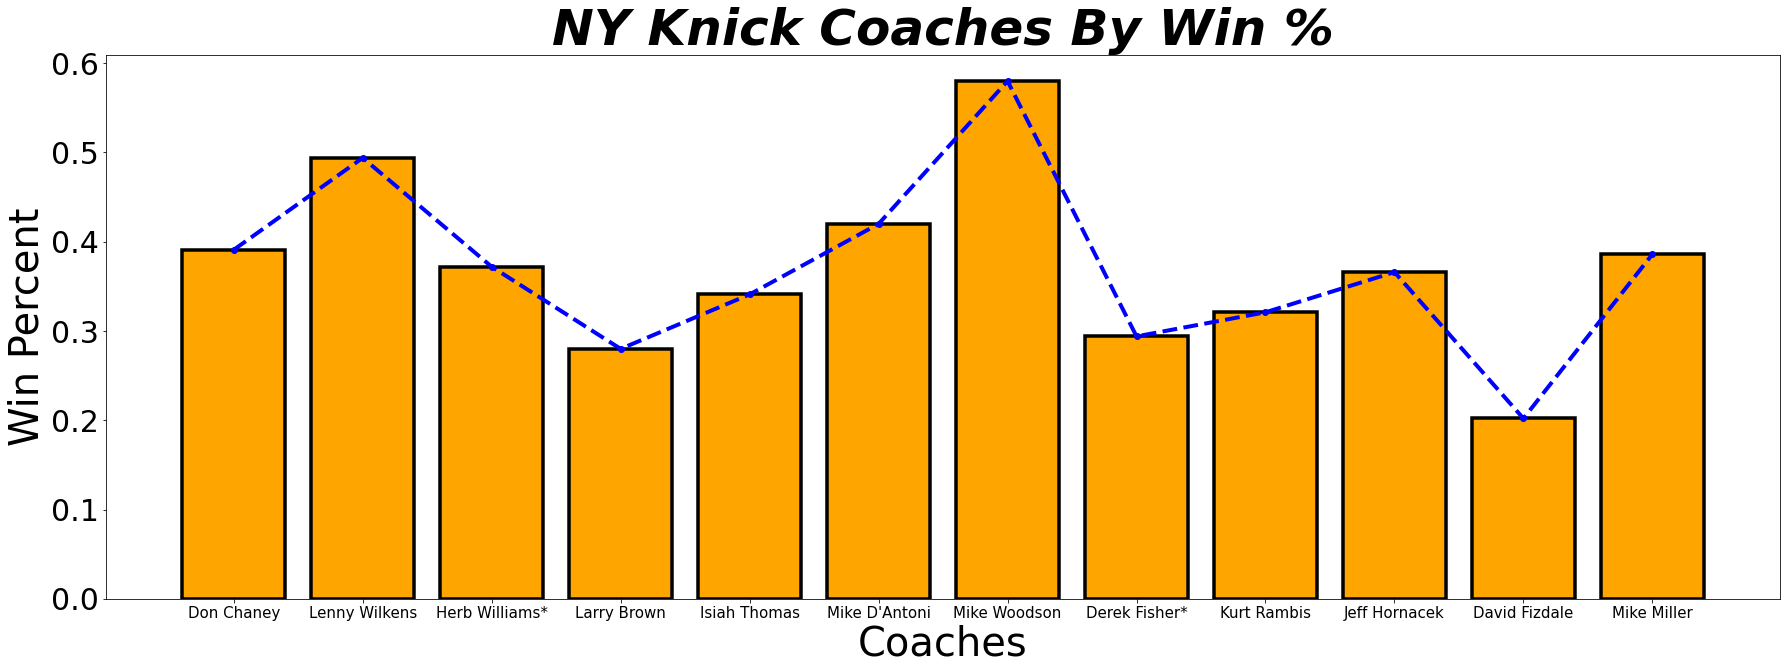

In [61]:
plt.figure(figsize=(30,10))
plt.plot(smaller_coaches['Name'], smaller_coaches['Win%'], 'b--o', linewidth=4.0)
plt.bar(smaller_coaches['Name'], smaller_coaches['Win%'],edgecolor='black', linewidth=3.5,color='orange');
plt.xlabel("Coaches",fontsize=40)
plt.ylabel("Win Percent",fontsize=40)
plt.title("NY Knick Coaches By Win %",fontsize=50,style='italic',fontweight='bold')
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 30) 
plt.show()



In [34]:
KNK=df.append(df.mean().rename('Average_Wins')).assign(Average=lambda df: df.mean(1))
KNK['Variance']= KNK['Average']-KNK['NYK']

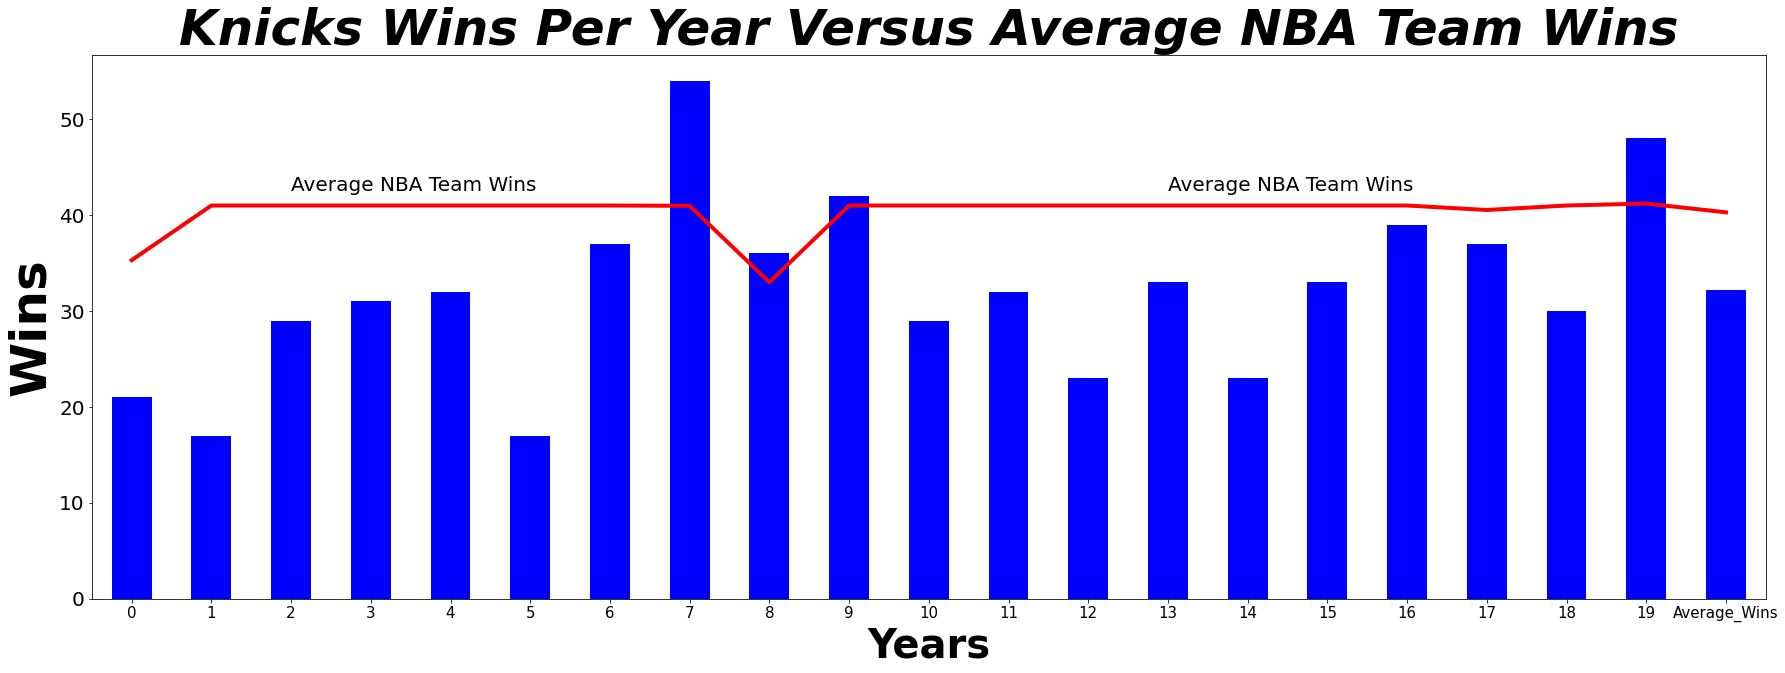

In [35]:
rcParams['figure.figsize'] = 30, 10
KNK['NYK'].plot.bar(color='blue')
KNK['Average'].plot(color='red',linewidth=4.0)

plt.text(2, 42.5, "Average NBA Team Wins",fontsize=20)
plt.text(13, 42.5, "Average NBA Team Wins",fontsize=20)

plt.xlabel("Years",fontsize=40,fontweight='bold')
plt.ylabel("Wins",fontsize=50,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.title("Knicks Wins Per Year Versus Average NBA Team Wins",fontsize=50,style='italic',fontweight='bold')
plt.show()

In [62]:
from google.colab import files
uploaded = files.upload()

Saving 2013_KNK!.xlsx to 2013_KNK!.xlsx


In [63]:
KNK_2013=pd.read_excel('2013_KNK!.xlsx')

In [64]:
KNK_2013

,Unnamed: 0,Unnamed: 1,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
0,1,Earl Barron,31,1,1,37.0,5.0,14.0,0.357,0.0,0.0,NaN,5.0,14.0,0.357,0.357,1.0,2.0,0.500,6.0,12.0,18.0,2.0,0.0,1.0,1.0,1.0,11.0
1,2,Carmelo Anthony,28,67,67,37.0,10.0,22.2,0.449,2.3,6.2,0.379,7.6,16.0,0.476,0.502,6.3,7.6,0.830,2.0,4.9,6.9,2.6,0.8,0.5,2.6,3.1,28.7
2,3,Raymond Felton,28,68,68,34.0,5.5,13.0,0.427,1.4,3.8,0.360,4.2,9.2,0.455,0.480,1.5,1.9,0.789,0.8,2.1,2.9,5.5,1.4,0.2,2.3,1.9,13.9
3,4,J.R. Smith,27,80,0,33.5,6.6,15.6,0.422,1.9,5.5,0.356,4.7,10.2,0.458,0.484,3.0,3.9,0.762,0.8,4.5,5.3,2.7,1.3,0.3,1.7,2.8,18.1
4,5,Tyson Chandler,30,66,66,32.8,3.9,6.1,0.638,0.0,0.0,NaN,3.9,6.1,0.638,0.638,2.7,3.9,0.694,4.1,6.6,10.7,0.9,0.6,1.1,1.3,2.8,10.4
5,6,Quentin Richardson,32,1,0,29.0,1.0,11.0,0.091,1.0,4.0,0.250,0.0,7.0,0.000,0.136,2.0,2.0,1.000,5.0,5.0,10.0,1.0,0.0,0.0,2.0,1.0,5.0
6,7,Jason Kidd,39,76,48,26.9,2.0,5.4,0.372,1.5,4.3,0.351,0.5,1.1,0.452,0.511,0.5,0.6,0.833,0.7,3.6,4.3,3.3,1.6,0.3,1.0,1.6,6.0
7,8,Kenyon Martin,35,18,11,23.9,3.1,5.2,0.602,0.0,0.0,NaN,3.1,5.2,0.602,0.602,0.9,2.2,0.425,1.9,3.4,5.3,0.4,0.9,0.9,0.9,3.6,7.2
8,9,Amar'e Stoudemire,30,29,0,23.5,5.3,9.2,0.577,0.0,0.0,NaN,5.3,9.2,0.577,0.577,3.6,4.5,0.808,2.1,2.9,5.0,0.4,0.3,0.7,1.7,3.1,14.2
9,10,Iman Shumpert,22,45,45,22.1,2.4,6.1,0.396,1.1,2.8,0.402,1.3,3.3,0.392,0.489,0.8,1.0,0.766,0.7,2.3,3.0,1.7,1.0,0.2,0.8,2.2,6.8


In [65]:
KNK_2013['Age'].mean()

31.31578947368421

In [67]:
KNK_2013.sort_values(by=['Age'], inplace=True, ascending=False)

In [68]:
KNK_2013

,Unnamed: 0,Unnamed: 1,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
17,18,Kurt Thomas,40,39,17,10.1,1.2,2.1,0.542,0.0,0.0,1.000,1.1,2.1,0.537,0.548,0.2,0.3,0.462,0.6,1.7,2.3,0.5,0.3,0.4,0.2,1.3,2.5
6,7,Jason Kidd,39,76,48,26.9,2.0,5.4,0.372,1.5,4.3,0.351,0.5,1.1,0.452,0.511,0.5,0.6,0.833,0.7,3.6,4.3,3.3,1.6,0.3,1.0,1.6,6.0
16,17,Marcus Camby,38,24,4,10.4,0.7,2.2,0.321,0.0,0.0,NaN,0.7,2.2,0.321,0.321,0.3,0.8,0.421,1.0,2.3,3.3,0.6,0.3,0.6,0.6,1.2,1.8
14,15,Rasheed Wallace,38,21,0,14.1,2.6,6.8,0.387,1.0,3.3,0.319,1.6,3.5,0.452,0.465,0.7,1.0,0.700,0.5,3.4,4.0,0.3,0.6,0.7,0.5,1.9,7.0
11,12,Pablo Prigioni,35,78,18,16.2,1.3,2.8,0.455,0.7,1.7,0.396,0.6,1.1,0.547,0.575,0.3,0.3,0.880,0.5,1.3,1.8,3.0,0.9,0.0,1.1,1.6,3.5
7,8,Kenyon Martin,35,18,11,23.9,3.1,5.2,0.602,0.0,0.0,NaN,3.1,5.2,0.602,0.602,0.9,2.2,0.425,1.9,3.4,5.3,0.4,0.9,0.9,0.9,3.6,7.2
5,6,Quentin Richardson,32,1,0,29.0,1.0,11.0,0.091,1.0,4.0,0.250,0.0,7.0,0.000,0.136,2.0,2.0,1.000,5.0,5.0,10.0,1.0,0.0,0.0,2.0,1.0,5.0
0,1,Earl Barron,31,1,1,37.0,5.0,14.0,0.357,0.0,0.0,NaN,5.0,14.0,0.357,0.357,1.0,2.0,0.500,6.0,12.0,18.0,2.0,0.0,1.0,1.0,1.0,11.0
4,5,Tyson Chandler,30,66,66,32.8,3.9,6.1,0.638,0.0,0.0,NaN,3.9,6.1,0.638,0.638,2.7,3.9,0.694,4.1,6.6,10.7,0.9,0.6,1.1,1.3,2.8,10.4
8,9,Amar'e Stoudemire,30,29,0,23.5,5.3,9.2,0.577,0.0,0.0,NaN,5.3,9.2,0.577,0.577,3.6,4.5,0.808,2.1,2.9,5.0,0.4,0.3,0.7,1.7,3.1,14.2


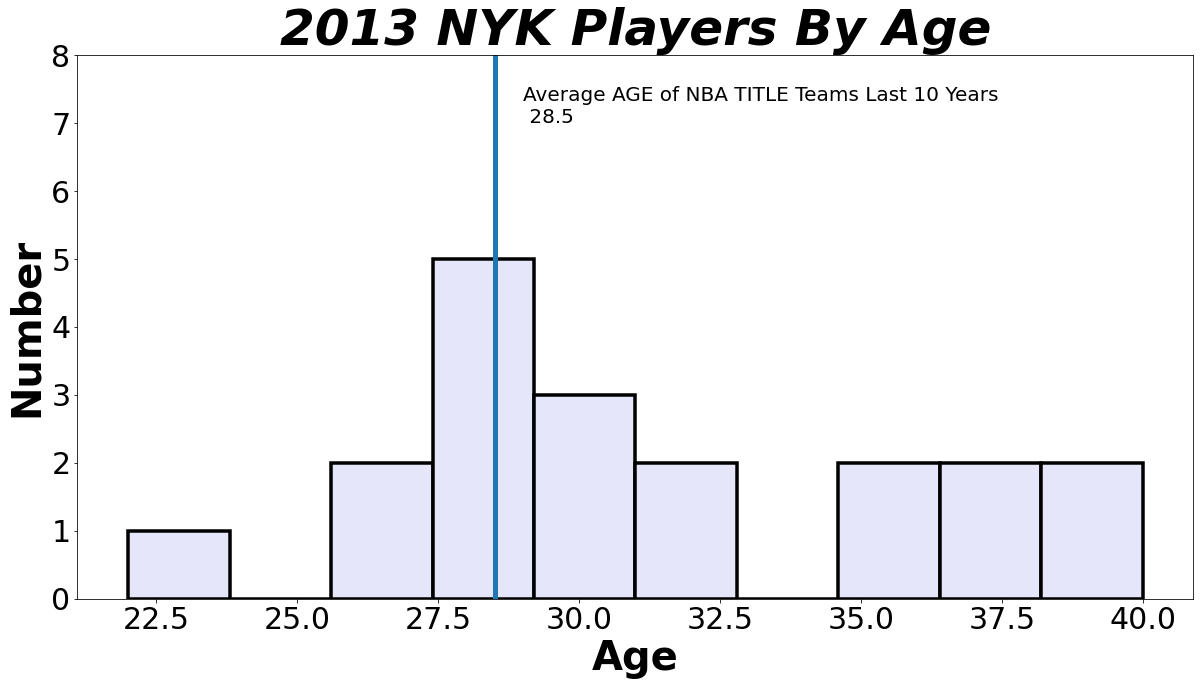

In [69]:
rcParams['figure.figsize'] = 20, 10
KNK_2013['Age'].plot.hist(edgecolor='black', linewidth=3.5,color='Lavender')

plt.axvline(x=28.5,linewidth=5)
plt.xlabel("Age",fontsize=40,fontweight='bold')
plt.ylabel("Number",fontsize=40,fontweight='bold')
plt.title("2013 NYK Players By Age",fontsize=50,style='italic',fontweight='bold')
plt.text(29, 7, "Average AGE of NBA TITLE Teams Last 10 Years \n 28.5",fontsize=20)
plt.xticks(fontsize= 30) 
plt.yticks(fontsize= 30)
plt.ylim((0,8)) 
plt.show()


In [70]:
from google.colab import files
uploaded = files.upload()


Saving NBA champions Last 8 years.xlsx to NBA champions Last 8 years.xlsx


In [71]:
data1 = pd.read_excel('NBA champions Last 8 years.xlsx', skiprows=2)

In [72]:
data1

,Year,Team,Points,Assists
0,2019,Toronto,1818,8118
1,2018,GS,2413,9650
2,2017,gs,2404,9304
3,2016,CC,1856,9408
4,2015,gs,2248,9016
5,2014,Sp,2064,8639
6,2013,Miami,1890,8436
7,2012,Miami,1317,6500


In [73]:
New = {'points':[8118,9650,9304,9408,9016,8636,8436,6500],
       'assists': [1818,2413,2404,1856,2248,2064,1890,1317],
       'NYK':[1456,1646,1912,1786,1682,1746,1641,1579]}



In [78]:
New1 = pd.DataFrame(New)
New1

,points,assists,NYK
0,8118,1818,1456
1,9650,2413,1646
2,9304,2404,1912
3,9408,1856,1786
4,9016,2248,1682
5,8636,2064,1746
6,8436,1890,1641
7,6500,1317,1579


In [79]:
KNK_Assiss = 1317
KNK_points = 6500

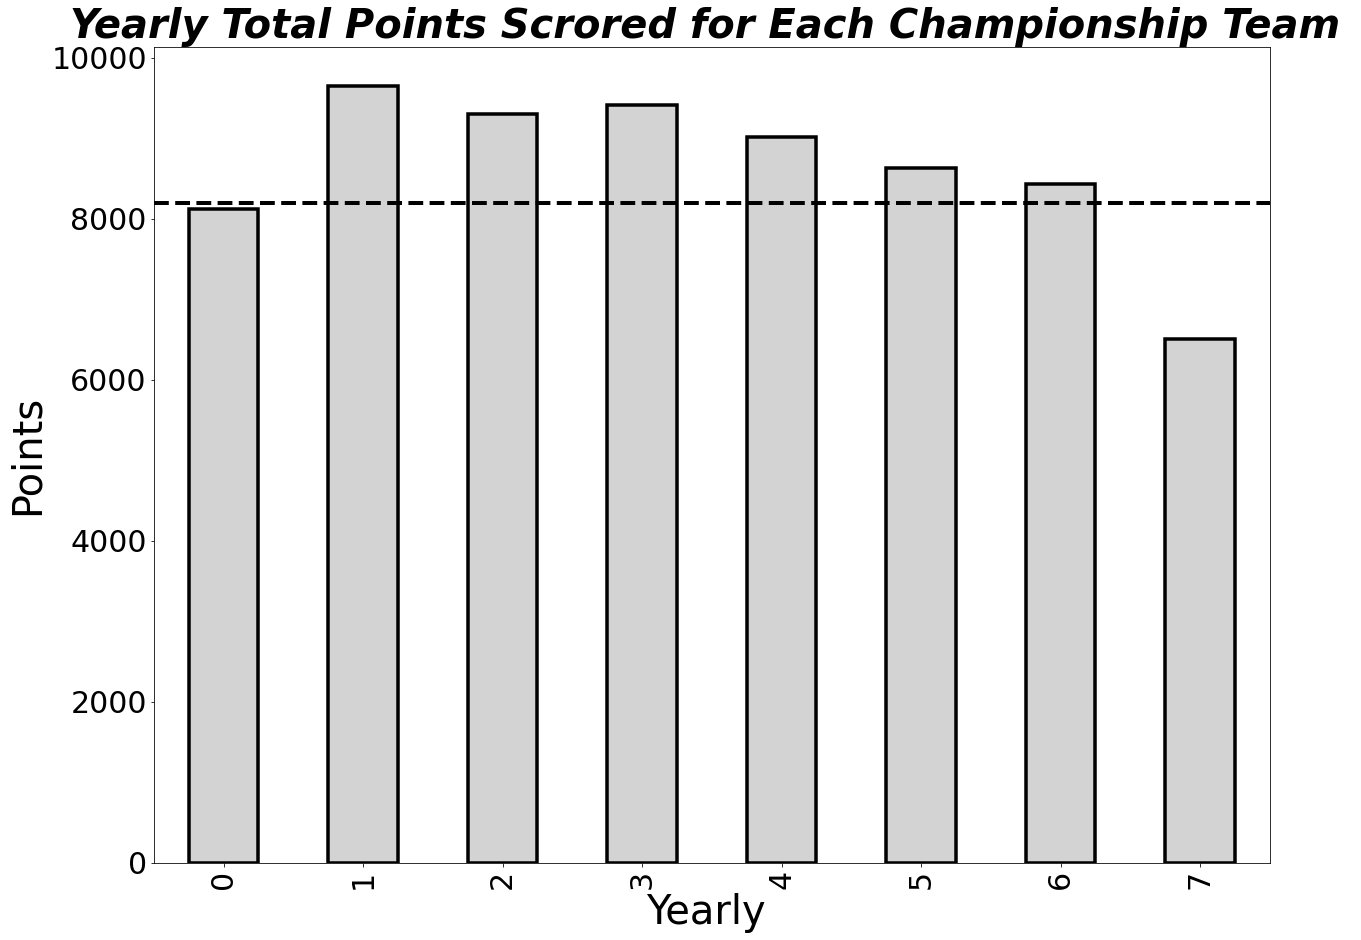

In [80]:
rcParams['figure.figsize'] = 20, 15
fig, ax = plt.subplots()
New1['points'].plot.bar(color ="lightgrey",edgecolor='black', linewidth=3.5);
plt.axhline(y = 8196, color ="black", linewidth = 4, linestyle ="--") 
plt.xlabel("Yearly ",fontsize=40)
plt.ylabel("Points",fontsize=40)
plt.title("Yearly Total Points Scrored for Each Championship Team ",fontsize=40,style='italic',fontweight='bold')
plt.xticks(fontsize= 30) 
plt.yticks(fontsize= 30) 
plt.show()

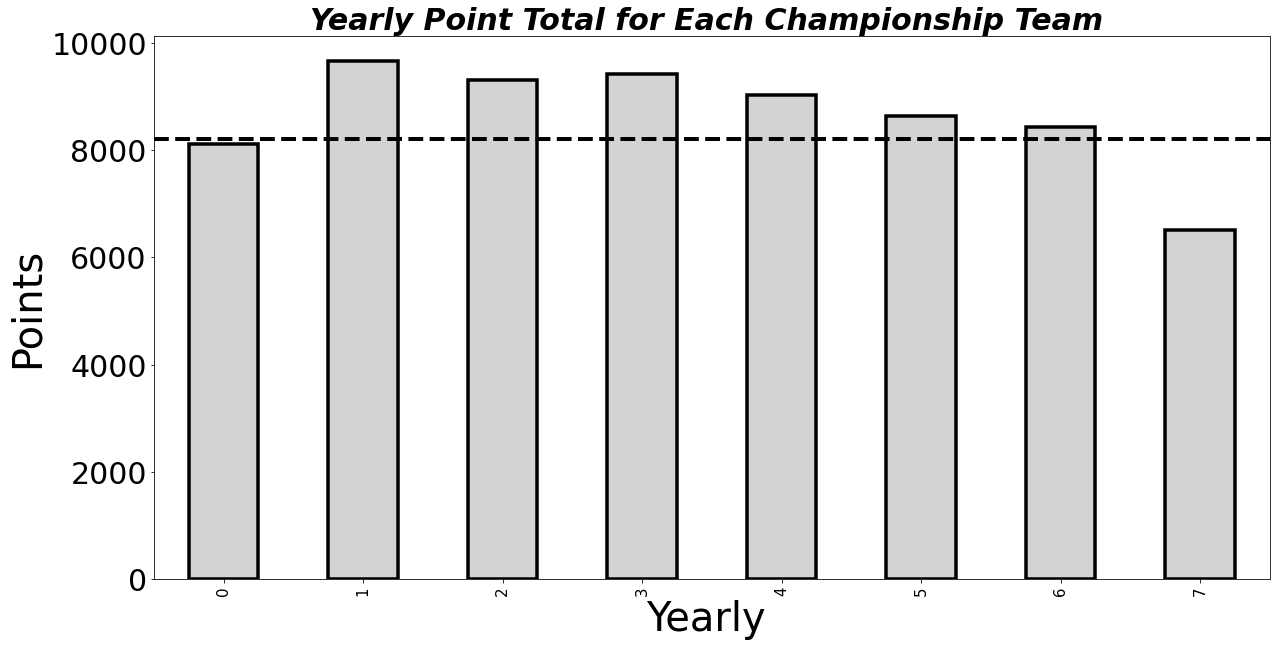

In [81]:
rcParams['figure.figsize'] = 20, 10
fig, ax = plt.subplots()
New1['points'].plot.bar(color ="lightgrey",edgecolor='black', linewidth=3.5);
plt.axhline(y = 8196, color ="black", linewidth = 4, linestyle ="--") 
plt.xlabel("Yearly ",fontsize=40)
plt.ylabel("Points",fontsize=40)
plt.title("Yearly Point Total for Each Championship Team ",fontsize=30,style='italic',fontweight='bold')
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 30) 
plt.show()

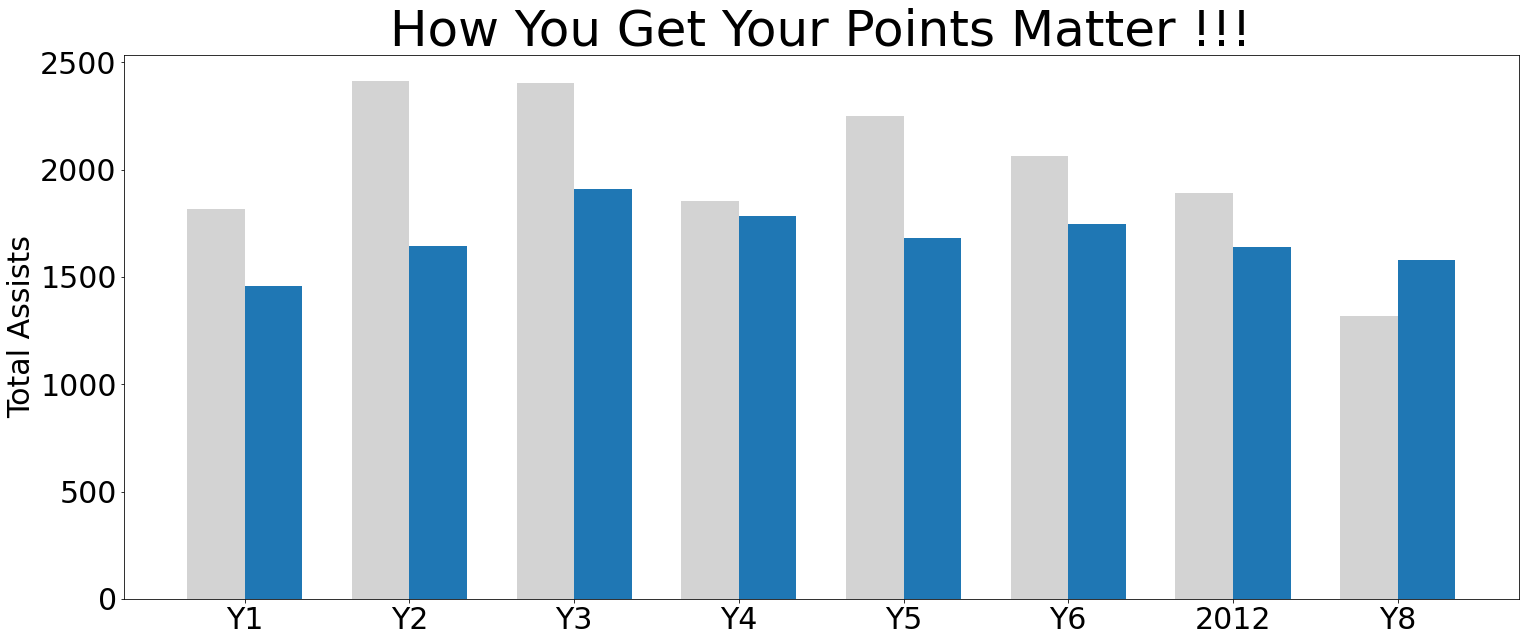

In [85]:
rcParams['figure.figsize'] = 25, 10
N = 8
men_means = New1['assists']
women_means = New1['NYK']

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, color='lightgrey', label='Total Assists by Each Championship Team')
plt.bar(ind + width, women_means, width,
    label='Assists New York Knicks')
#plt.axhline(y = 1579, color ="black", linewidth = 4, linestyle ="--") 

plt.ylabel('Total Assists',fontsize= 30 )
plt.title('How You Get Your Points Matter !!!',fontsize= 50)
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 30) 
plt.xticks(ind + width / 2, ('Y1', 'Y2', 'Y3', 'Y4', 'Y5','Y6','2012','Y8'),fontsize= 30)

plt.show()